# Final Project COGS118B - Image Classification (MNIST dataset)

## Authors: Álvaro Maza Montesinos & Juan Villanueva Romero

## Introduction & Motivation

The main goal of this project consists on performing image classification using Convolutional Neural Networks (CNN). One of our biggest motivations to focus on image classification is to get a deeper knowledge about Neural Networks, which have been introduced as a topic in class, but have not been put into practice in our homeworks.

In order to perform this task, we will be using one of the most well-known datasets in machine learning, the MNIST dataset.This dataset contains 60,000 training images and 10,000 testing images, all of them corresponding to handwritten digits labeled from 0 to 9. Our idea is to create a model sufficiently accurate to identify the number that has been written.

For this project, we will be using Python as the programming language, importing some libraries like numpy for array manipulation, pandas, matplotlib for plots, and Tensorflow/Keras to build the Convolutional Neural Networks. In fact, this last ML framework already contains the dataset so that it can be easily loaded.

As a guideline for this project, we will be following the nexts steps:

1. Setting up the environmnet and loading the data
2. Data visualization
3. Model construction
4. Anaylisis of the results 
5. Graphic User Interface (GUI) for digit classification
6. Conclusions


## Setting the environment and loading the data

In [ ]:
import numpy as np 
import tensorflow
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

After setting the environment and loading the data, we decided to divide the values of the pixels by 255 as part of the pre-processing of the images. This will make the pixels have values between 0 and 1 (normalized). This step is considerably important when working with Neural Networks, since the weights are initialize as small values and we need the pixels to be of a similar scale.

In [ ]:
(train_set, train_label), (test_set, test_label) = mnist.load_data()
train_set, test_set = train_set/255, test_set/255

11490434/11490434 [==============================] - 2s 0us/step


Also, we will store a vectorize version of the data and pandas dataframes for future steps of the process. This will help us when working with some libraries which do not support numpy arrays but pandas dataframes, or viceversa.

In [ ]:
vect_train_set = train_set.reshape(60000,-1)
vect_test_set = test_set.reshape(10000,-1)
df_x = pd.DataFrame(vect_train_set)
df_y = pd.DataFrame(train_label)

## Data visualization

Let's take a look at some of the images contained in our dataset, we will plot 10 of them:

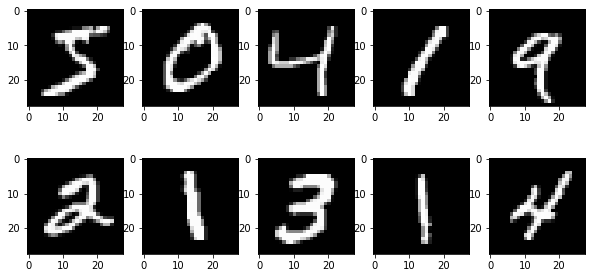

In [ ]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_set[i],cmap='gray')

Now, we will plot the count for each of the labels in the training data, just to make sure that the proportions within the dataset are more or less balanced:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


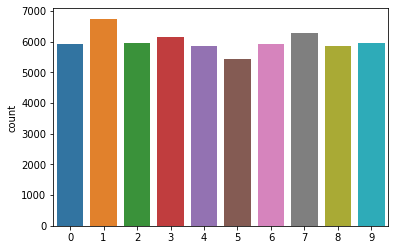

In [ ]:
sns.countplot(train_label)
plt.show()

In [ ]:
df_y.value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

Apparently, the training dataset is quite balanced with respect to the labels. Moreover, we already know the dataset does not contain any NAs, meaning it does not need any more preprocessing, so we can now focus on model construction.

## Model construction

### Benchmark model - Random forest

Before creating the Convolutional Neural Network, we will define a benchmark model (a random forest in this case) so that we have a reference of accuracy on image classification with traditional machine learning techniques.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)
randomf=RandomForestClassifier(n_estimators=70)
randomf.fit(X_train,y_train)

<ipython-input-8-ff6ea77e834d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=70)

Once we have defined the model, let's make the predictions and display the confusion matrix:

In [ ]:
predictions =randomf.predict(X_test)
print ("Confusion Matrix")
print(confusion_matrix(y_test, predictions))

Confusion Matrix
[[1190    0    2    0    1    2    2    0    7    1]
 [   0 1364    5    4    3    0    1    1    1    0]
 [   4    0 1129    6    5    2    4   10    4    2]
 [   2    0   13 1155    0   18    1    9    9    1]
 [   2    0    0    1 1122    0    7    2    2   17]
 [   8    1    2   15    2 1027    7    0    9    4]
 [   4    2    2    0    3   13 1162    0    4    0]
 [   2    2   12    1    3    0    0 1188    4   16]
 [   1    5    6    6    5    9    7    0 1141   11]
 [   3    2    2   12   14    5    1    8    6 1152]]


The results are really good, even better than expected. However, since we want a more robust result, we need to perform cross validation so that we make sure our predictions were not affected by the split of the data.

In [ ]:
rf=RandomForestClassifier(n_estimators=70)
rf.fit(df_x, df_y)
score = cross_val_score(rf, df_x, df_y)
print (np.mean(score))

<ipython-input-10-e2606a4ab3cf>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(df_x, df_y)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

0.9665166666666668


Finally, we have a reference value of accuracy we can take into account when creating our CNN. 

### Convolutional Neural Network (CNN)

At this point, we need to define the structure of our CNN. The structure will the following one:

- First convolutional layer with 32 kernels, window size 5, padding size 2, stride 1 (ReLU activation layer)

- Max pooling layer with window size 2, stride 2

- Second convolutional layer with 64 kernels, window size 5, padding size 2, stride 1 (ReLU activation layer)

- Max pooling layer with window size 2, stride 2

- First fully connected layer with 1024 output channels (ReLU activation layer)

- Second fully connected layer with 10 output channels (Softmax)

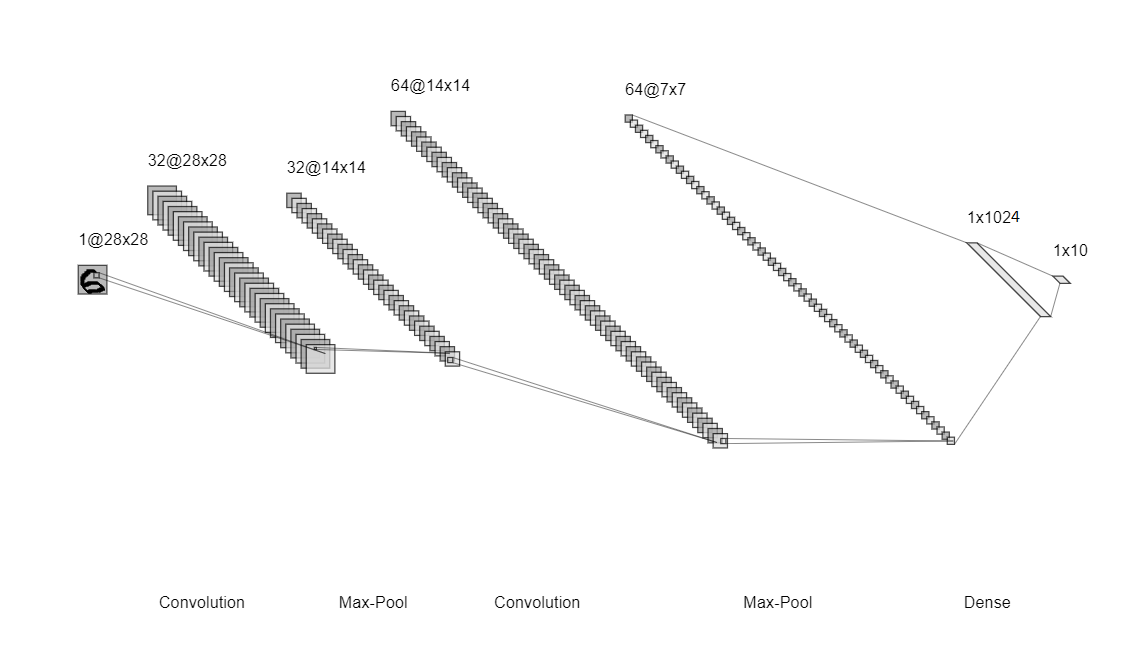


Also, as discussed in the notes of the course (_backpropslides.pdf_), we must include a regularization method so that our results are not overfitted. After studying the different possibilities to deal with overfitting in a Convolutional Neural Network, we reached the conclusion that randomly eliminating some of the neurons of the model is one of the most optimal alternatives. Hence, we will include a dropout of 30% with the objective of avoiding results with excessive accuracy due to overfitting. 

In relation with the activation for the hidden layers, altough the sigmoid function was discussed in class, we decided to use the rectified linear activation function, or ReLU activation function, which is maybe simpler, but also really effective to overcome some of the limitations of the former one. The ReLu activation function is less susceptible to vanishing gradients that prevent deep models from being trained.

Lastly, the activation function used for the output layer corresponds to the softmax function.  This activation outputs a vector of values that sum to 1.0 that can be interpreted as probabilities of class membership.

In [ ]:
def build_cnn(input_shape=(28, 28, 1)):
    
    # Create the model
    cnn = Sequential()

    # First convolutional layer with in place relu activation
    cnn.add(Conv2D(32, kernel_size = 5, padding = 'same', strides = 1, activation='relu', input_shape = input_shape))
    # Applying max pool 2x2
    cnn.add(MaxPool2D(pool_size=(2,2)))
    # Second convolutional layer with in place relu activation
    cnn.add(Conv2D(64, kernel_size = 5, strides=1, padding = 'same', activation='relu'))
    # Applying max pool 2x2
    cnn.add(MaxPool2D(pool_size=(2,2)))
    
    cnn.add(Flatten())
    # First fully connected layer with 1024 output channels and in place relu activation
    cnn.add(Dense(1024, activation='relu'))
    # Dropout of 30%
    cnn.add(Dropout(0.3))
    # Second fully connected layer with 10 output channels and softmax activation
    cnn.add(Dense(10, activation='softmax'))

    return cnn


Now, let's reshape the data and correctly encode the labels so that we can then impute them into the model:

In [ ]:
# Reshape the data so that the CNN receives an input of shape (28,28,1)
train_data = vect_train_set.reshape(vect_train_set.shape[0], 28, 28, 1)
test_data = vect_test_set.reshape(vect_test_set.shape[0], 28, 28, 1)

# Encode the labels as categorical values
number_classes = train_label.max() - train_label.min() + 1
train_label = to_categorical(train_label, num_classes = number_classes)
test_label = to_categorical(test_label, num_classes = number_classes)

In [ ]:
train_data[0].shape

(28, 28, 1)

Finally, let's create our model and train it. For this taks of the project, we need to decide several aspects:

- The optimization method used by the Convolutional Neural Network
- The criterion to determine the loss of our model
- The metrics we want to store so that we can later analyze the results

### Adam Optmizer

The Adam optimizer is an extension to stochastic gradient descent which has gained importance in the sector of computer vision during the last years. Altough, the results when using conjugate gradient as proposed in class could have also been good, we both agreed to include this algorithm since we are more familiarized with it.

### Categorical Cross-Entropy Loss

Instead of using sum of squares error as a measure of loss, since we are working with multi-label classification, we will be employing one of the concepts introduced in class, entropy. In fact, this is the more logical approach due to the implementation of the softamax layer at the end of the CNN.

### Metrics

We will focus on the accuracy of the predictions as main metric of our model. In fact, since we will be perfroming cross-validation as an extra measure to avoid overfitting, our main goal is to analyze the variations in the validation accuracy.

In [ ]:
# Create the model
model = build_cnn()
# Train the model with cross-validation 80% train // 20% test
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

## Anaylisis of the results

Once the model has been created and trained, we can now make predictions over the labels of the testing data:

In [ ]:
results = model.fit(train_data, train_label, shuffle=True, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 13s 4ms/step - loss: 0.1161 - accuracy: 0.9639 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0422 - accuracy: 0.9864 - val_loss: 0.0402 - val_accuracy: 0.9900
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0351 - val_accuracy: 0.9891
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0405 - val_accuracy: 0.9893
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0390 - val_accuracy: 0.9908
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0675 - val_accuracy: 0.9874
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0408 - val_accuracy

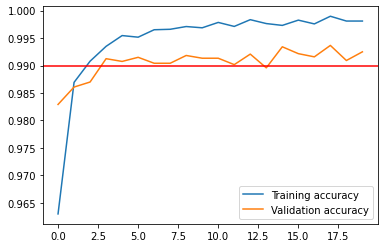

In [ ]:
plt.plot(results.history['accuracy'],label = str('Training accuracy'))
plt.plot(results.history['val_accuracy'],label = str('Validation accuracy'))
plt.axhline(y = 0.99, color = 'r', linestyle = '-')
plt.legend()
plt.show()

After performing prediction over the testing dataset for several times (the amount of iterations is determined by the epochs), we have obtained really good values of accuracy and validation accuracy.

In the plot above, we can clearly see a big increment in the training accuracy, which tends to stabilize after the first five iterations and reaches values very close to 1. However, we must focus on the validation accuracy. In this case, it is clear that after 20 iterations the improvements are minimal, having a validation accuracy around 99%. So now, we can make the predictions for the testing data.

Also, we can plot the images corresponding to the predictions which failed so that we can understand why the Convolutional Neural Network was not able to correctly select a label.


313/313 [==============================] - 1s 2ms/step
Test accuracy:  0.9924


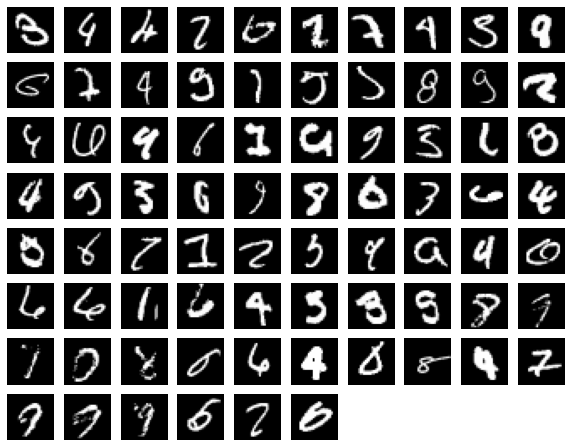

In [ ]:
# Predictions over the testing data
predictions = model.predict(test_data)

# Since the predictions are given as probabilities, convert them to the corresponding label using np.argmax()
predictions_test = np.array([])
# Iterate through the predictions
for i in predictions:
    predictions_test = np.append(predictions_test,np.argmax(i))

# Test accuracy
print('Test accuracy: ',np.sum(predictions_test == np.argmax(test_label,1))/len(predictions_test))

# True/False array for each observation
matches = predictions_test == np.argmax(test_label,1)
# Wrong predictions
wrongs = test_data[~matches]

# Plot of the wrong prediction images
plt.figure(figsize=(10,10))
for i in range(len(wrongs)):
    plt.subplot(10, 10, i+1)
    plt.imshow(wrongs[i][:,:,0],cmap='gray')
    plt.axis('off')

We can see that most of the digits are clearly distorted, with strange shapes that can be confusing to understand, not only for a neural network, but also for us visually.

In general, the obtained results are extremely good, even better than expected. Although at the beginning we were not completely sure about how to define a good architecture for the model (amount of layers, activation functions, etc), we have finally achieved our objective.

 On the other hand, if we had to mention anything that went wrong during the creation of the model, it would probably be related to the excessive computational requirements of Convolutional Neural Networks.  If we compare this model to traditional machine learning algorithms, and especially in this case in which we have a really large training dataset, the training times are considerably higher, making the debugging process more tedious.



## Graphic User Interface (GUI) 

The line of code below saves the CNN model that we have obtained after all the training process. Since it is not possible to display a Graphic User Interface using Jupyter Notebook, we have just created a separated python script so that it can be executed. To execute the application, download the model after executing the line below and then run the app contained in the main folder of the project:

In [ ]:
model.save('mnist_cnn.h5')

The way of using the Graphical User Interface is quite simple, altought it has some limitations. The idea of creating the API comes from the following article:

https://data-flair.training/blogs/python-deep-learning-project-handwritten-digit-recognition/

which contains the main core of the python code we have used, although we needed to perform some modifcations since it did not work for us perfectly well. The main idea is to run this API during our live presentation. However, for further details about how to execute it, refer to the README.md document in the GitHub repository:

https://github.com/juan-villa02/COGS118B-FINAL-PROJECT.git

These are some examples of outputs for the API:

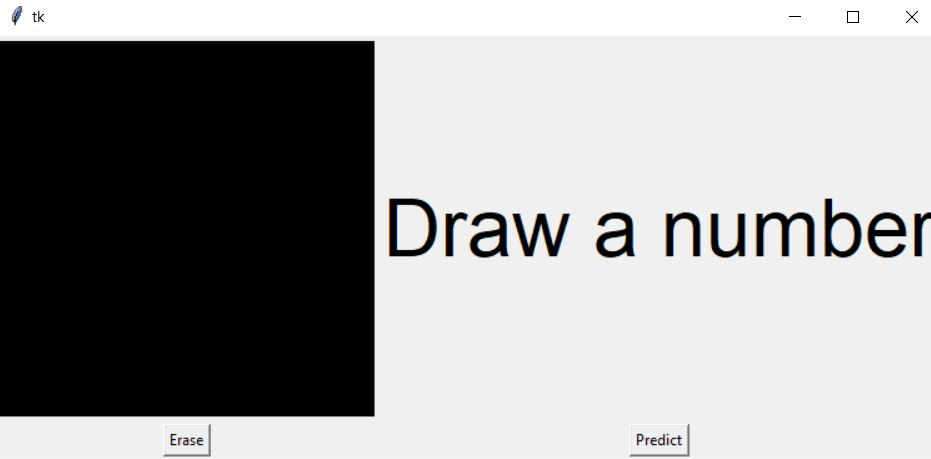

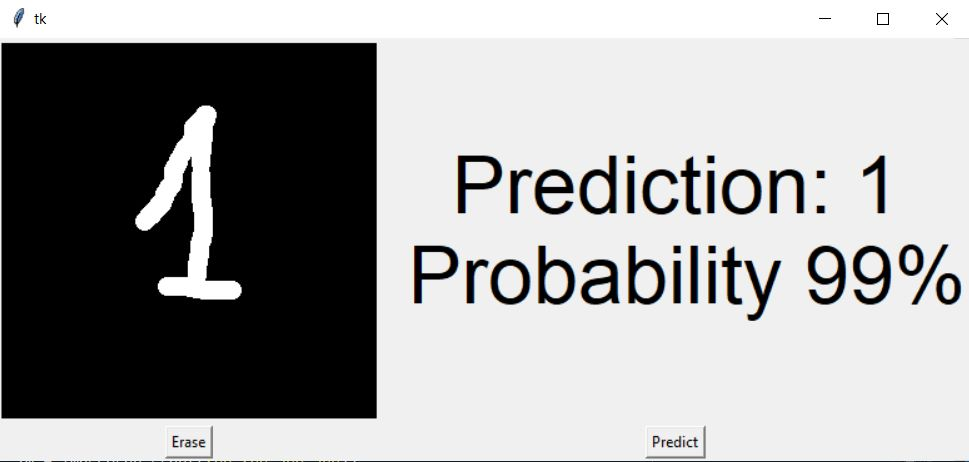

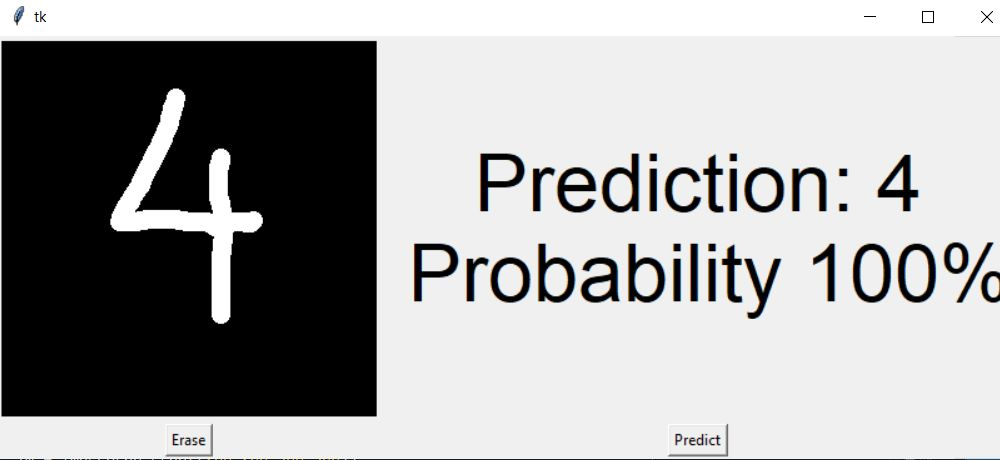

## Conclusions

This project has been an amazing opportunity for both of us to get started into the Deep Learning world, and more specifically, into the implementation of Convolutional Neural Networks for image classification. We both agree that the obtained results are better than we expected when starting this project, altough there is still room for improvement.

First of all, even if the accuracy of our final model is around 99%, we would have liked to implement more different types of architectures for the CNN so that we can learn more about this type of models, but this was not possible for us due to time limitations. Also, we feel like could have peformed a more precise hyper parameter tunning in relation with the optimzer of the CNN, but the computational cost of this process was really demanding, making it difficult to debug the code. On the other hand, we have some suggestions for future improvements or lines of work. 

On one side, we think it could be interesting to train our model with more complex numbers (not only one digit), or implement a function that can separate/distinguish numbers within a same image and then predict the output. The main limitation to this idea would be related to the definitions of the labels, since we could not have labels for every single number. 

Also, it could be really interesting to train this model not only with digits, but with letters of the alphabet. In this manner, the applications of the model would be really useful for real-life situations. In fact, this technology is used by one of the most well-known online translator in the world, Google Translator. By using the camera of a smartphone, our model would be able to identify letters and numbers of a picture and transform them into a digital document.

To conclude, we are really satisfied with the results of the project and the fact that we have been able to put into practice some of the knowledge acquired during this course. 

